In [1]:
#%pip install random-survival-forest
#%pip install scikit-survival

In [2]:
# pip install plotly

In [3]:
import pandas as pd
# data = pd.read_csv('encoded_values_2.csv')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px #for histogram
sns.set(style="whitegrid")

In [4]:
# pip install lifelines

In [5]:
# pip install lifelines

In [48]:
import random
import pandas as pd
from lifelines import CoxPHFitter, KaplanMeierFitter

np.random.seed(45)
# Define lists for different fields
genders = ['Male', 'Female']
churns = ['Yes', 'No']
residences = ['Off-campus', 'On-campus']
usage_frequency = ['Daily', 'Several times a week', 'Occasionally', 'Rarely', 'Never']
network_strength = [1, 2, 3, 4, 5]
services_used = ['Voice Calls', 'Mobile data/Internet', 'SMS/Text messaging']
data_allowance_exhaustion = ['Yes', 'No']
other_networks = ['Yes', 'No']
considered_discontinuing = ['Yes', 'No']
reasons_for_discontinuing = ['Poor network quality/coverage', 'Insufficient data allowance', 'Unsatisfactory customer service', 'High costs/pricing']
monthly_data = ['0-2', '2-4', '4-6', '6-8', '8 and more']

# Define a function to generate synthetic responses
def generate_responses(num_responses):
    responses = []
    for _ in range(num_responses):
        gender = random.choices(genders, weights=[0.34, 0.66], k=1)[0]
        churn = random.choices(churns, weights=[0.05, 0.95], k=1)[0]
        residence = random.choices(residences, weights=[0.83, 0.17], k=1)[0]
        usage_frequency_value = random.choices(usage_frequency, weights=[0.494, 0.16, 0.21, 0.049, 0.086], k=1)[0]
        network_strength_value = random.choices(network_strength, weights=[0.25, 0.247, 0.333, 0.086, 0.025], k=1)[0]
        voice_calls_value = random.choices(['Yes', 'No'], weights=[0.815, 0.185], k=1)[0]
        mobile_data_internet_value = random.choices(['Yes', 'No'], weights=[0.865, 0.135], k=1)[0]
        sms_text_messaging_value = random.choices(['Yes', 'No'], weights=[0.51, 0.48], k=1)[0]
        data_allowance_exhaustion_value = random.choices(data_allowance_exhaustion, weights=[0.827, 0.173], k=1)[0]
        other_networks_values = random.choices(other_networks, weights=[0.90, 0.1], k=1)[0]
        # considered_discontinuing_value = random.choices(considered_discontinuing, weights=[0.84, 0.16], k=1)[0]
        monthly_data_usage = random.choices(monthly_data, weights=[0.05, 0.1, 0.05, 0.1, 0.7], k=1)[0]

        # poor_network_quality_coverage = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.704, 0.296], k=1)[0]
        # # insufficient_data_allowance = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.3, 0.7], k=1)[0]
        # unsatisfactory_customer_service = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.39, 0.61], k=1)[0]
        # high_costs_pricing = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.545, 0.455], k=1)[0]
        poor_network_quality_coverage = random.choices(['Yes', 'No'], weights=[0.704, 0.296], k=1)[0]
        # insufficient_data_allowance = random.choices(['Yes', 'No'], weights=[0.3, 0.7], k=1)[0]
        unsatisfactory_customer_service = random.choices(['Yes', 'No'], weights=[0.39, 0.61], k=1)[0]
        high_costs_pricing = random.choices(['Yes', 'No'], weights=[0.545, 0.455], k=1)[0]



        # Determine churn level
        churn_level = random.randint(1, 3) if churn == 'Yes' else 4

        responses.append([gender, churn, residence, usage_frequency_value, network_strength_value, voice_calls_value, mobile_data_internet_value, sms_text_messaging_value, data_allowance_exhaustion_value, other_networks_values, poor_network_quality_coverage, unsatisfactory_customer_service, high_costs_pricing, monthly_data_usage, churn_level])

    return responses

# Generate synthetic responses for a sample size of 338
sample_size = 338
responses = generate_responses(sample_size)

# Create a DataFrame from the synthetic responses
columns = ['Gender' ,'Churn', 'Residence', 'Usage_Freq', 'Network_Strength', 'Voice_Calls', 'Mobile_Data_Internet', 'SMS_Text_Messaging', 'Data_Exhaustion','Multiple_Networks', 'Poor_Network_Quality_Coverage', 'Unsatisfactory_Customer_Service', 'High_Costs_Pricing', 'Monthly_Data_Usage', 'Churn_Level']

data = pd.DataFrame(responses, columns=columns)

# Display the DataFrame
(data.head())

# Optional: Save the synthetic responses to a CSV file
# data.to_csv('sampleData.csv', index=False)


,Gender,Churn,Residence,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Multiple_Networks,Poor_Network_Quality_Coverage,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage,Churn_Level
0,Female,No,Off-campus,Occasionally,1,No,Yes,No,No,Yes,No,Yes,No,4-6,4
1,Female,No,Off-campus,Several times a week,2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,8 and more,4
2,Female,No,On-campus,Daily,3,No,Yes,Yes,Yes,No,No,Yes,No,8 and more,4
3,Female,No,Off-campus,Occasionally,2,Yes,Yes,No,Yes,Yes,Yes,No,No,8 and more,4
4,Female,Yes,Off-campus,Several times a week,2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,8 and more,2


In [7]:
# import random
# import pandas as pd
# from lifelines import CoxPHFitter, KaplanMeierFitter

# np.random.seed(45)
# # Define lists for different fields
# genders = ['Male', 'Female']
# churns = ['Yes', 'No']
# residences = ['Off-campus', 'On-campus']
# usage_frequency = ['Daily', 'Several times a week', 'Occasionally', 'Rarely', 'Never']
# network_strength = [1, 2, 3, 4, 5]
# services_used = ['Voice Calls', 'Mobile data/Internet', 'SMS/Text messaging']
# data_allowance_exhaustion = ['Yes', 'No']
# other_networks = ['Yes', 'No']
# considered_discontinuing = ['Yes', 'No']
# reasons_for_discontinuing = ['Poor network quality/coverage', 'Insufficient data allowance', 'Unsatisfactory customer service', 'High costs/pricing']
# monthly_data = ['0-2', '2-4', '4-6', '6-8', '8 and more']

# # Define a function to generate synthetic responses
# def generate_responses(num_responses):
#     responses = []
#     for _ in range(num_responses):
#         gender = random.choices(genders, weights=[0.442, 0.558], k=1)[0]
#         churn = random.choices(churns, weights=[0.05, 0.95], k=1)[0]
#         residence = random.choices(residences, weights=[0.679, 0.321], k=1)[0]
#         usage_frequency_value = random.choices(usage_frequency, weights=[0.494, 0.16, 0.21, 0.049, 0.086], k=1)[0]
#         network_strength_value = random.choices(network_strength, weights=[0.25, 0.247, 0.333, 0.086, 0.025], k=1)[0]
#         voice_calls_value = random.choices(['Yes', 'No'], weights=[0.815, 0.185], k=1)[0]
#         mobile_data_internet_value = random.choices(['Yes', 'No'], weights=[0.84, 0.16], k=1)[0]
#         sms_text_messaging_value = random.choices(['Yes', 'No'], weights=[0.51, 0.48], k=1)[0]
#         data_allowance_exhaustion_value = random.choices(data_allowance_exhaustion, weights=[0.827, 0.173], k=1)[0]
#         other_networks_values = random.choices(other_networks, weights=[0.938, 0.062], k=1)[0]
#         considered_discontinuing_value = random.choices(considered_discontinuing, weights=[0.84, 0.16], k=1)[0]
#         monthly_data_usage = random.choices(monthly_data, weights=[0.05, 0.1, 0.15, 0.2, 0.5], k=1)[0]

#         # poor_network_quality_coverage = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.704, 0.296], k=1)[0]
#         # # insufficient_data_allowance = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.3, 0.7], k=1)[0]
#         # unsatisfactory_customer_service = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.39, 0.61], k=1)[0]
#         # high_costs_pricing = 'Yes' if churn == 'No' else random.choices(['Yes', 'No'], weights=[0.545, 0.455], k=1)[0]
#         poor_network_quality_coverage = random.choices(['Yes', 'No'], weights=[0.704, 0.296], k=1)[0]
#         # insufficient_data_allowance = random.choices(['Yes', 'No'], weights=[0.3, 0.7], k=1)[0]
#         unsatisfactory_customer_service = random.choices(['Yes', 'No'], weights=[0.39, 0.61], k=1)[0]
#         high_costs_pricing = random.choices(['Yes', 'No'], weights=[0.545, 0.455], k=1)[0]



#         # Determine churn level
#         churn_level = random.randint(1, 3) if churn == 'Yes' else 4

#         responses.append([gender, churn, residence, usage_frequency_value, network_strength_value, voice_calls_value, mobile_data_internet_value, sms_text_messaging_value, data_allowance_exhaustion_value, other_networks_values, poor_network_quality_coverage, unsatisfactory_customer_service, high_costs_pricing, monthly_data_usage, churn_level])

#     return responses

# # Generate synthetic responses for a sample size of 338
# sample_size = 338
# responses = generate_responses(sample_size)

# # Create a DataFrame from the synthetic responses
# columns = ['Gender' ,'Churn', 'Residence', 'Usage_Freq', 'Network_Strength', 'Voice_Calls', 'Mobile_Data_Internet', 'SMS_Text_Messaging', 'Data_Exhaustion','Multiple_Networks', 'Poor_Network_Quality_Coverage', 'Unsatisfactory_Customer_Service', 'High_Costs_Pricing', 'Monthly_Data_Usage', 'Churn_Level']

# data = pd.DataFrame(responses, columns=columns)

# # Display the DataFrame
# (data.head())

# # Optional: Save the synthetic responses to a CSV file
# data.to_csv('sampleData.csv', index=False)


In [8]:
# pip install ydata_profiling


In [9]:
# from ydata_profiling import ProfileReport

# ProfileReport(data, title="Profiling Report")

In [10]:
data.describe()

,Network_Strength,Churn_Level
count,338.000000,338.000000
mean,2.390533,3.860947
std,1.028452,0.545998
min,1.000000,1.000000
25%,2.000000,4.000000
50%,2.000000,4.000000
75%,3.000000,4.000000
max,5.000000,4.000000


In [11]:
data.describe(include=["object", "bool"]) # For non-numeric


,Gender,Churn,Residence,Usage_Freq,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Multiple_Networks,Poor_Network_Quality_Coverage,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage
count,338,338,338,338,338,338,338,338,338,338,338,338,338
unique,2,2,2,5,2,2,2,2,2,2,2,2,5
top,Female,No,Off-campus,Daily,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,8 and more
freq,213,315,275,160,273,289,183,277,304,236,186,190,248


In [12]:
# Check for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

missing_values


Gender                             0
Churn                              0
Residence                          0
Usage_Freq                         0
Network_Strength                   0
Voice_Calls                        0
Mobile_Data_Internet               0
SMS_Text_Messaging                 0
Data_Exhaustion                    0
Multiple_Networks                  0
Poor_Network_Quality_Coverage      0
Unsatisfactory_Customer_Service    0
High_Costs_Pricing                 0
Monthly_Data_Usage                 0
Churn_Level                        0
dtype: int64

In [13]:

pd.crosstab(data["Churn"], data["Gender"], margins=True)


Gender,Female,Male,All
Churn,,,
No,197,118,315
Yes,16,7,23
All,213,125,338


In [14]:

color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Residence",  title="<b>Churn distribution by Residence</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [15]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions of Students",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [16]:
import plotly.graph_objects as go

labels = data['Usage_Freq'].unique()
values = data['Usage_Freq'].value_counts()

# Define explode values; set non-zero values for the slices you want to explode
explode = [0.1 if label in ['Rarely', 'Daily'] else 0 for label in labels]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value',
                             hole=.5, pull=explode,
                             textposition='outside')])

fig.update_layout(title_text="<b>Usage Frequency Distribution</b>")

fig.show()


In [17]:
# plt.figure(figsize=(25, 10))
# corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
# # sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


In [50]:
# Create a DataFrame to store the encoded values
encoded_values = pd.DataFrame(columns=['Feature', 'Category', 'Encoded Value'])
# Get all the categorical columns
category_feature = data.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each categorical feature
for feature in category_feature:
    # Fit the LabelEncoder on the current feature and transform the data
    data[feature] = le.fit_transform(data[feature])

    # Get the encoded values for the current feature
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        # Create a temporary DataFrame to hold the current row
        temp_df = pd.DataFrame([{'Feature': feature, 'Category': category, 'Encoded Value': encoded_value}])

        # Append the temporary DataFrame to the main DataFrame
        encoded_values = pd.concat([encoded_values, temp_df], ignore_index=True)


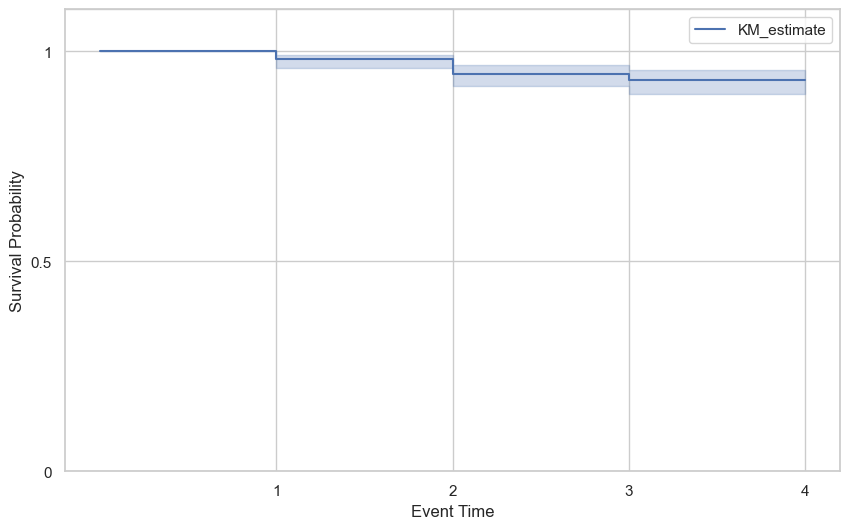

,Event Time,Number of Individuals,Number of Events,Survival Probability,Lower CI,Upper CI
0,0.0,338,0,1.000000,1.000000,1.000000
1,1.0,338,6,0.982249,0.960916,0.991986
2,2.0,332,12,0.946746,0.916802,0.966111
3,3.0,320,5,0.931953,0.899371,0.954252
4,4.0,315,0,0.931953,0.899371,0.954252


In [19]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
# Assuming 'data' is your dataset with columns 'Level' and 'Churn'

# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(data['Churn_Level'], data['Churn'])

# Initial number of censored individuals
initial_censored = 338

# Calculate number of censored individuals (did not churn) at each event time
n_individuals = len(data)
censored_counts = [initial_censored]

for i in range(1, len(kmf.timeline)):
    churned_count = kmf.event_table.iloc[i-1]['observed']  # Number of events (churns) at current event time
    censored_count = censored_counts[i-1] - churned_count
    censored_counts.append(censored_count)

# Extract event counts (number of churns) at each event time
event_counts = kmf.event_table['observed'].values

# Extract survival probabilities
survival_probs = kmf.survival_function_.iloc[:, 0].values

# Confidence intervals from Kaplan-Meier estimator
confidence_intervals = kmf.confidence_interval_survival_function_

# Create a DataFrame to display the information
table_data = {
    'Event Time': kmf.timeline,
    'Number of Individuals': censored_counts,
    'Number of Events': event_counts,

    'Survival Probability': survival_probs,
    'Lower CI': confidence_intervals['KM_estimate_lower_0.95'].values,
    'Upper CI': confidence_intervals['KM_estimate_upper_0.95'].values
}

df = pd.DataFrame(table_data)



# Plotting the survival curves using Kaplan-Meier Estimator
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
# plt.ylim(0, 1)  # Ensure y-axis ranges from 0 to 1

# Set custom y-axis ticks and labels
plt.yticks([0, 0.5, 1,1.1], ['0', '0.5', '1',''])
plt.xticks([ 1, 2,3,4,4.2], ['1', '2', '3','4',''])

plt.xlabel('Event Time')
plt.ylabel('Survival Probability')
plt.show()

# Print the DataFrame
df


<lifelines.CoxPHFitter: fitted with 338 total observations, 315 right-censored observations>
             duration col = 'Churn_Level'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 338
number of events observed = 23
   partial log-likelihood = -123.69
         time fit was run = 2024-08-13 23:59:03 UTC

---
                                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                        
Gender                          -0.20      0.82      0.47           -1.11            0.72                0.33                2.05
Residence                       -0.46      0.63      0.63           -1.69            0.78                0.18                2.18
Usage_Freq                       0.20      1.22      0.13           -0.07            0.46                0.94                1.59
Network_Strength                 0.28      1.33      0.20           -0.12            0.68                0.89                1.98
Voice_Calls                      1.00      2.73      0.75           -0.46            2.47                0.63               11.78
Mobile_Data_Internet             1.67      5.31      1.04           -0.36            3.70                0.70               40.56
SMS_Text_Messaging               0.56      1.74      0.45           -0.32            1.43                0.73                4.18
Data_Exhaustion                  1.69      5.40      1.03           -0.33            3.71                0.72               40.67
Multiple_Networks                0.09      1.09      0.75           -1.39            1.56                0.25                4.78
Poor_Network_Quality_Coverage   -0.17      0.85      0.46           -1.07            0.74                0.34                2.10
Unsatisfactory_Customer_Service -0.12      0.89      0.43           -0.96            0.73                0.38                2.07
High_Costs_Pricing               0.55      1.73      0.44           -0.32            1.42                0.72                4.13
Monthly_Data_Usage               0.27      1.31      0.25           -0.23            0.76                0.80                2.13

                                 cmp to     z    p  -log2(p)
covariate                                                   
Gender                             0.00 -0.42 0.67      0.57
Residence                          0.00 -0.72 0.47      1.09
Usage_Freq                         0.00  1.47 0.14      2.81
Network_Strength                   0.00  1.38 0.17      2.59
Voice_Calls                        0.00  1.35 0.18      2.49
Mobile_Data_Internet               0.00  1.61 0.11      3.22
SMS_Text_Messaging                 0.00  1.24 0.21      2.23
Data_Exhaustion                    0.00  1.64 0.10      3.30
Multiple_Networks                  0.00  0.12 0.90      0.14
Poor_Network_Quality_Coverage      0.00 -0.36 0.72      0.47
Unsatisfactory_Customer_Service    0.00 -0.27 0.79      0.34
High_Costs_Pricing                 0.00  1.23 0.22      2.19
Monthly_Data_Usage                 0.00  1.06 0.29      1.79
---
Concordance = 0.75
Partial AIC = 273.39
log-likelihood ratio test = 18.94 on 13 df
-log2(p) of ll-ratio test = 3.00

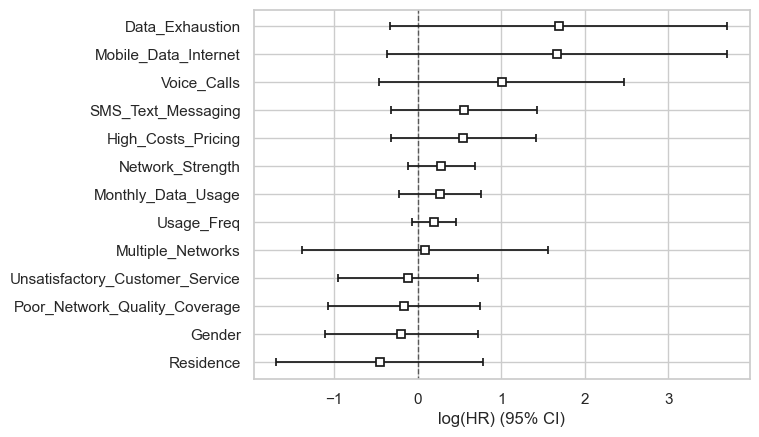

In [20]:
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
# Initialize the Cox Proportional Hazards model
cph = CoxPHFitter()
# data = data.drop(columns=['High_Costs_Pricing','Multiple_Networks','Other_Networks_Better_Services','Poor_Network_Quality_Coverage'])
# data = data.drop(columns='Poor_Network_Quality_Coverage')

# Fit the model
cph.fit(data, duration_col='Churn_Level', event_col='Churn')

# Display the summary
cph.print_summary()

# Plot the coefficients
cph.plot()
# plt.title('Cox Proportional Hazards Model Coefficients')
plt.show()


In [21]:
# data['Level'] = data['Level']/100

# data

In [22]:
# import pandas as pd
# from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
# import numpy as np

# # Sample data
# data = pd.DataFrame({
#     'Churn_Level': np.random.exponential(1, 100),
#     'Churn': np.random.randint(0, 2, 100)
# })

# # Instantiate each AFT fitter
# weibull_aft = WeibullAFTFitter()
# lognormal_aft = LogNormalAFTFitter()
# loglogistic_aft = LogLogisticAFTFitter()

# # Fit to data and collect AIC, BIC, and Hanna-Quinn values
# aft_metrics = {}
# for model in [weibull_aft, lognormal_aft, loglogistic_aft]:
#     model.fit(data, duration_col='Churn_Level', event_col='Churn')
#     aic = model.AIC_
#     bic = model.BIC_  # You can get BIC directly from lifelines
#     n = len(data)
#     k = len(model.params_)

#     # Hanna-Quinn criterion calculation
#     hqc = np.log(n) * k * np.log(np.log(n)) + 2 * k * np.log(n)

#     aft_metrics[model.__class__.__name__] = {
#         'AIC': aic,
#         'BIC': bic,
#         'Hanna-Quinn': hqc
#     }

# # Create a DataFrame from the metrics
# metrics_df = pd.DataFrame(aft_metrics).T
# metrics_df.index.name = 'Model'
# metrics_df = metrics_df.reset_index()

# print("Model Comparison Metrics:")
# print(metrics_df)

# # Find the model with the lowest AIC, BIC, and Hanna-Quinn
# best_aft_model_aic = metrics_df.loc[metrics_df['AIC'].idxmin(), 'Model']
# best_aft_model_bic = metrics_df.loc[metrics_df['BIC'].idxmin(), 'Model']
# best_aft_model_hqc = metrics_df.loc[metrics_df['Hanna-Quinn'].idxmin(), 'Model']

# print(f"\nThe AFT model with the lowest AIC is: {best_aft_model_aic}")
# print(f"The AFT model with the lowest BIC is: {best_aft_model_bic}")
# print(f"The AFT model with the lowest Hanna-Quinn is: {best_aft_model_hqc}")


In [23]:
from lifelines import LogNormalAFTFitter
weibull_aft = LogNormalAFTFitter()
weibull_aft.fit(data, duration_col='Churn_Level', event_col='Churn')
weibull_aft.print_summary(3)

<lifelines.LogNormalAFTFitter: fitted with 338 total observations, 315 right-censored observations>
             duration col = 'Churn_Level'
                event col = 'Churn'
   number of observations = 338
number of events observed = 23
           log-likelihood = -103.355
         time fit was run = 2024-08-13 23:59:04 UTC

---
                                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                                         
mu_    Data_Exhaustion                 -1.228     0.293     0.683          -2.567           0.111               0.077               1.117
       Gender                           0.220     1.246     0.345          -0.457           0.897               0.633               2.452
       High_Costs_Pricing              -0.422     0.656     0.346          -1.100           0.256               0.333               1.292
       Mobile_Data_Internet            -1.291     0.275     0.743          -2.747           0.166               0.064               1.180
       Monthly_Data_Usage              -0.208     0.812     0.182          -0.566           0.149               0.568               1.161
       Multiple_Networks               -0.160     0.852     0.596          -1.329           1.008               0.265               2.741
       Network_Strength                -0.235     0.791     0.161          -0.549           0.080               0.577               1.083
       Poor_Network_Quality_Coverage    0.002     1.002     0.355          -0.693           0.697               0.500               2.008
       Residence                        0.374     1.454     0.471          -0.549           1.298               0.578               3.661
       SMS_Text_Messaging              -0.426     0.653     0.341          -1.095           0.242               0.335               1.274
       Unsatisfactory_Customer_Service  0.040     1.041     0.323          -0.593           0.674               0.553               1.962
       Usage_Freq                      -0.141     0.869     0.105          -0.347           0.066               0.707               1.068
       Voice_Calls                     -0.925     0.396     0.565          -2.033           0.182               0.131               1.200
       Intercept                        8.623  5560.127     2.014           4.675          12.572             107.251           2.882e+05
sigma_ Intercept                        0.371     1.449     0.185           0.008           0.733               1.009               2.082

                                        cmp to      z       p  -log2(p)
param  covariate                                                       
mu_    Data_Exhaustion                   0.000 -1.798   0.072     3.791
       Gender                            0.000  0.637   0.524     0.932
       High_Costs_Pricing                0.000 -1.219   0.223     2.166
       Mobile_Data_Internet              0.000 -1.737   0.082     3.602
       Monthly_Data_Usage                0.000 -1.142   0.253     1.981
       Multiple_Networks                 0.000 -0.269   0.788     0.343
       Network_Strength                  0.000 -1.462   0.144     2.800
       Poor_Network_Quality_Coverage     0.000  0.005   0.996     0.006
       Residence                         0.000  0.795   0.427     1.228
       SMS_Text_Messaging                0.000 -1.250   0.211     2.242
       Unsatisfactory_Customer_Service   0.000  0.125   0.900     0.151
       Usage_Freq                        0.000 -1.336   0.182     2.461
       Voice_Calls                       0.000 -1.638   0.101     3.301
       Intercept                         0.000  4.281 <0.0005    15.713
sigma_ Intercept                         0.000  2.006   0.045     4.478
---
Concordance = 0.753
AIC = 236.710
log-likelihood ratio test = 20.862 on 13 df
-log2(p) of 

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

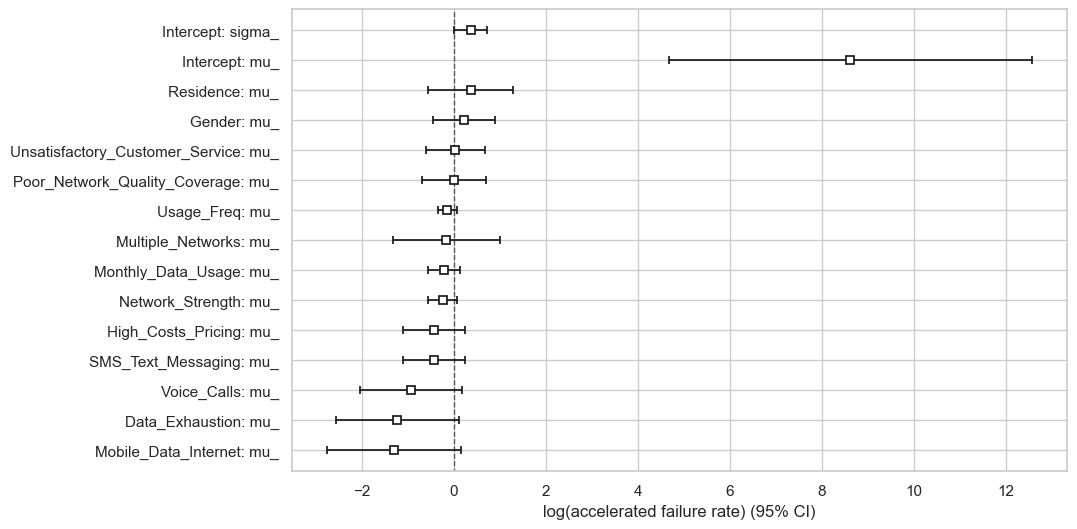

In [24]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot()


In [25]:
# from lifelines import CoxPHFitter

# # Initialize the Cox Proportional Hazards model
# cph = CoxPHFitter()

# # Fit the model
# cph.fit(data, duration_col='Level', event_col='Churn')

# # Display the summary
# cph.print_summary()

# # Plot the coefficients
# cph.plot()
# plt.title('Cox Proportional Hazards Model Coefficients')
# plt.show()


In [26]:
from lifelines.statistics import proportional_hazard_test

# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(data, duration_col='Churn_Level', event_col='Churn')

# Perform the proportional hazards test
results = proportional_hazard_test(cph, data, time_transform='rank')

# # Print the results
# cph.plot_partial_effects_on_outcome('Other_Networks_Better_Services', values=[0, 1, 2, 3, 4])
# plt.title('Partial Effects of Other Networks Better Services on Survival')
# plt.show()
results# Plot the scaled Schoenfeld residuals


# Interpretation and validation
# (This will involve checking the summary output, coefficients, and assumption checks)


<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 338 total observations, 315 right-censored observations>
         test_name = proportional_hazard_test

---
                                 test_statistic    p  -log2(p)
Data_Exhaustion                            0.38 0.54      0.89
Gender                                     0.37 0.54      0.88
High_Costs_Pricing                         1.08 0.30      1.74
Mobile_Data_Internet                       0.04 0.84      0.25
Monthly_Data_Usage                         1.65 0.20      2.33
Multiple_Networks                          1.13 0.29      1.79
Network_Strength                           0.00 1.00      0.00
Poor_Network_Quality_Coverage              0.49 0.48      1.05
Residence                                  0.30 0.58      0.78
SMS_Text_Messaging                         0.36 0.55      0.86
Unsatisfactory_Customer_Service            0.54 0.46      1.11
Usage_Freq                                 0.03 0.87      0.20
Voice_Calls                                1.91 0.17      2.58

In [46]:
# from lifelines import CoxPHFitter
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame and 'cph' is your fitted CoxPH model
# cph = CoxPHFitter()
# cph.fit(data, duration_col='Churn_Level', event_col='Churn')

# # Plot Schoenfeld residuals
# cph.check_assumptions(data, p_value_threshold=0.05)


In [51]:
import pandas as pd
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
import numpy as np


# Instantiate each AFT fitter
weibull_aft = WeibullAFTFitter()
lognormal_aft = LogNormalAFTFitter()
loglogistic_aft = LogLogisticAFTFitter()

# Fit to data and collect AIC, BIC, and Hanna-Quinn values
aft_metrics = {}
for model in [weibull_aft, lognormal_aft, loglogistic_aft]:
    model.fit(data, duration_col='Churn_Level', event_col='Churn')
    aic = model.AIC_
    bic = model.BIC_  # You can get BIC directly from lifelines
    n = len(data)
    k = len(model.params_)

    # Hanna-Quinn criterion calculation
    hqc = np.log(n) * k * np.log(np.log(n)) + 2 * k * np.log(n)

    aft_metrics[model.__class__.__name__] = {
        'AIC': aic,
        'BIC': bic,
        'Hanna-Quinn': hqc
    }

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(aft_metrics).T
metrics_df.index.name = 'Model'
metrics_df = metrics_df.reset_index()

print("Model Comparison Metrics:")
print(metrics_df)

# Find the model with the lowest AIC, BIC, and Hanna-Quinn
best_aft_model_aic = metrics_df.loc[metrics_df['AIC'].idxmin(), 'Model']
best_aft_model_bic = metrics_df.loc[metrics_df['BIC'].idxmin(), 'Model']
best_aft_model_hqc = metrics_df.loc[metrics_df['Hanna-Quinn'].idxmin(), 'Model']

print(f"\nThe AFT model with the lowest AIC is: {best_aft_model_aic}")
print(f"The AFT model with the lowest BIC is: {best_aft_model_bic}")
print(f"The AFT model with the lowest Hanna-Quinn is: {best_aft_model_hqc}")


Model Comparison Metrics:
                  Model         AIC         BIC  Hanna-Quinn
0      WeibullAFTFitter  192.797010  174.443102   328.579061
1    LogNormalAFTFitter  189.982139  171.628230   328.579061
2  LogLogisticAFTFitter  192.498056  174.144148   328.579061

The AFT model with the lowest AIC is: LogNormalAFTFitter
The AFT model with the lowest BIC is: LogNormalAFTFitter
The AFT model with the lowest Hanna-Quinn is: WeibullAFTFitter


In [57]:
import pandas as pd
from lifelines import WeibullFitter, LogNormalFitter, LogLogisticFitter
# Define the duration and event columns
duration_col = 'Churn_Level'
event_col = 'Churn'

# Fit Weibull model
weibull_model = WeibullFitter()
weibull_model.fit(data[duration_col], data[event_col])

# Fit Log-Normal model
lognormal_model = LogNormalFitter()
lognormal_model.fit(data[duration_col], data[event_col])

# Fit Log-Logistic model
loglogistic_model = LogLogisticFitter()
loglogistic_model.fit(data[duration_col], data[event_col])

# Calculate AIC, BIC, and Hannan-Quinn criteria
models = {
    'Weibull': weibull_model,
    'Log-Normal': lognormal_model,
    'Log-Logistic': loglogistic_model
}

results = {}
for model_name, model in models.items():
    aic = model.AIC_
    bic = model.BIC_
    # hqic = model.HQIC_
    results[model_name] = {'AIC': aic, 'BIC': bic}

# Print the results
for model_name, criteria in results.items():
    print(f"{model_name} Model:")
    print(f"AIC: {criteria['AIC']}")
    print(f"BIC: {criteria['BIC']}")
    # print(f"Hannan-Quinn: {criteria['Hannan-Quinn']}")
    print()

Weibull Model:
AIC: 176.98902622576662
BIC: 184.63511801673266

Log-Normal Model:
AIC: 174.9097511551766
BIC: 182.55584294614263

Log-Logistic Model:
AIC: 176.82339882684315
BIC: 184.46949061780919

